# EDA

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("phonemizer _dataset_v1.csv/phonemizer _dataset_v1.csv")

In [14]:
df

,Unnamed: 0,sentence,text_no_eraab
0,0,گوشی جدید اَپِل دیروز رونمایی شد.,گوشی جدید اپل دیروز رونمایی شد.
1,1,اَپِل همیشه طراحی خاصی دارد.,اپل همیشه طراحی خاصی دارد.
2,2,گوشی جدید اَپِل دیروز رونمایی شد.,گوشی جدید اپل دیروز رونمایی شد.
3,3,شرکت اَپِل نوآوری‌های زیادی ارائه داده.,شرکت اپل نوآوری‌های زیادی ارائه داده.
4,4,اَپِل همیشه طراحی خاصی دارد.,اپل همیشه طراحی خاصی دارد.
...,...,...,...
190993,190993,همه از حَشَر احترام می‌گذارند.,همه از حشر احترام می‌گذارند.
190994,190994,دیروز با حَشَر صحبت کردم و چیزهای جالبی گفت.,دیروز با حشر صحبت کردم و چیزهای جالبی گفت.
190995,190995,به نظر من حَشَر نقش مهمی در خانواده دارد.,به نظر من حشر نقش مهمی در خانواده دارد.
190996,190996,وقتی اسم حَشَر را می‌شنوم یاد کودکی‌ام می‌افتم.,وقتی اسم حشر را می‌شنوم یاد کودکی‌ام می‌افتم.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190998 entries, 0 to 190997
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     190998 non-null  int64 
 1   sentence       190998 non-null  object
 2   text_no_eraab  190998 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.4+ MB


In [16]:
df.describe()

,Unnamed: 0
count,190998.000000
mean,95498.500000
std,55136.517695
min,0.000000
25%,47749.250000
50%,95498.500000
75%,143247.750000
max,190997.000000


In [17]:
df.isnull().sum()

Unnamed: 0       0
sentence         0
text_no_eraab    0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df = df.drop(columns=['Unnamed: 0'])

In [20]:
df['sentence_len'] = df['sentence'].apply(len)

In [21]:
df['text_no_eraab_len'] = df['text_no_eraab'].apply(len)

In [22]:
df['sentence_word_count'] = df['sentence'].apply(lambda x: len(x.split()))

In [23]:
df['text_no_eraab_word_count'] = df['text_no_eraab'].apply(lambda x: len(x.split()))

In [24]:
df

,sentence,text_no_eraab,sentence_len,text_no_eraab_len,sentence_word_count,text_no_eraab_word_count
0,گوشی جدید اَپِل دیروز رونمایی شد.,گوشی جدید اپل دیروز رونمایی شد.,33,31,6,6
1,اَپِل همیشه طراحی خاصی دارد.,اپل همیشه طراحی خاصی دارد.,28,26,5,5
2,گوشی جدید اَپِل دیروز رونمایی شد.,گوشی جدید اپل دیروز رونمایی شد.,33,31,6,6
3,شرکت اَپِل نوآوری‌های زیادی ارائه داده.,شرکت اپل نوآوری‌های زیادی ارائه داده.,39,37,6,6
4,اَپِل همیشه طراحی خاصی دارد.,اپل همیشه طراحی خاصی دارد.,28,26,5,5
...,...,...,...,...,...,...
190993,همه از حَشَر احترام می‌گذارند.,همه از حشر احترام می‌گذارند.,30,28,5,5
190994,دیروز با حَشَر صحبت کردم و چیزهای جالبی گفت.,دیروز با حشر صحبت کردم و چیزهای جالبی گفت.,44,42,9,9
190995,به نظر من حَشَر نقش مهمی در خانواده دارد.,به نظر من حشر نقش مهمی در خانواده دارد.,41,39,9,9
190996,وقتی اسم حَشَر را می‌شنوم یاد کودکی‌ام می‌افتم.,وقتی اسم حشر را می‌شنوم یاد کودکی‌ام می‌افتم.,47,45,8,8


In [25]:
df['eraab_count'] = df['sentence_len'] - df['text_no_eraab_len']

In [26]:
df

,sentence,text_no_eraab,sentence_len,text_no_eraab_len,sentence_word_count,text_no_eraab_word_count,eraab_count
0,گوشی جدید اَپِل دیروز رونمایی شد.,گوشی جدید اپل دیروز رونمایی شد.,33,31,6,6,2
1,اَپِل همیشه طراحی خاصی دارد.,اپل همیشه طراحی خاصی دارد.,28,26,5,5,2
2,گوشی جدید اَپِل دیروز رونمایی شد.,گوشی جدید اپل دیروز رونمایی شد.,33,31,6,6,2
3,شرکت اَپِل نوآوری‌های زیادی ارائه داده.,شرکت اپل نوآوری‌های زیادی ارائه داده.,39,37,6,6,2
4,اَپِل همیشه طراحی خاصی دارد.,اپل همیشه طراحی خاصی دارد.,28,26,5,5,2
...,...,...,...,...,...,...,...
190993,همه از حَشَر احترام می‌گذارند.,همه از حشر احترام می‌گذارند.,30,28,5,5,2
190994,دیروز با حَشَر صحبت کردم و چیزهای جالبی گفت.,دیروز با حشر صحبت کردم و چیزهای جالبی گفت.,44,42,9,9,2
190995,به نظر من حَشَر نقش مهمی در خانواده دارد.,به نظر من حشر نقش مهمی در خانواده دارد.,41,39,9,9,2
190996,وقتی اسم حَشَر را می‌شنوم یاد کودکی‌ام می‌افتم.,وقتی اسم حشر را می‌شنوم یاد کودکی‌ام می‌افتم.,47,45,8,8,2


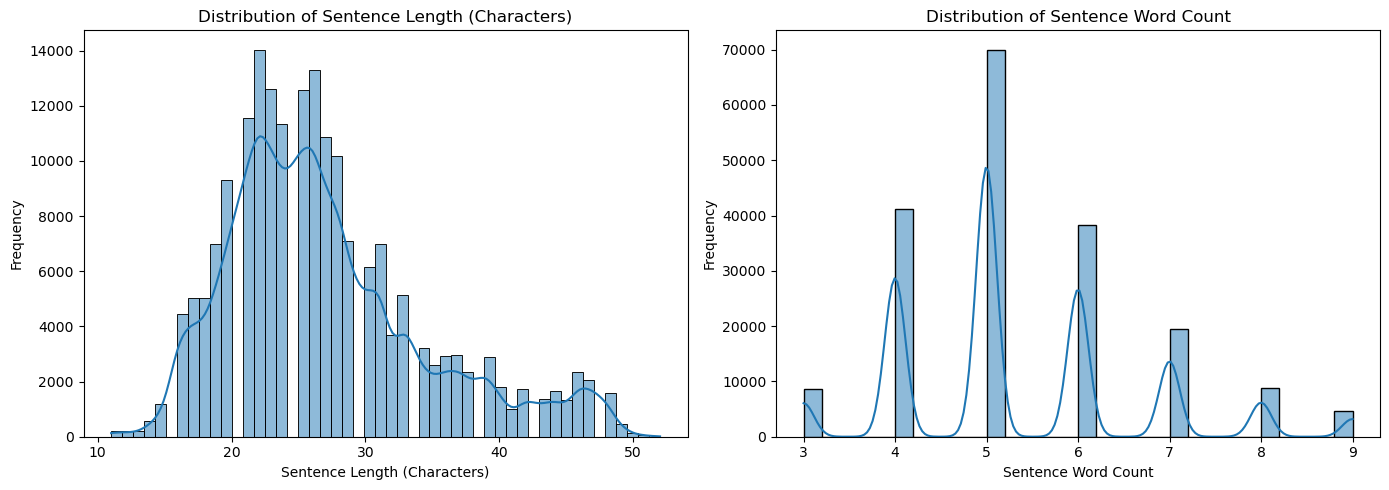

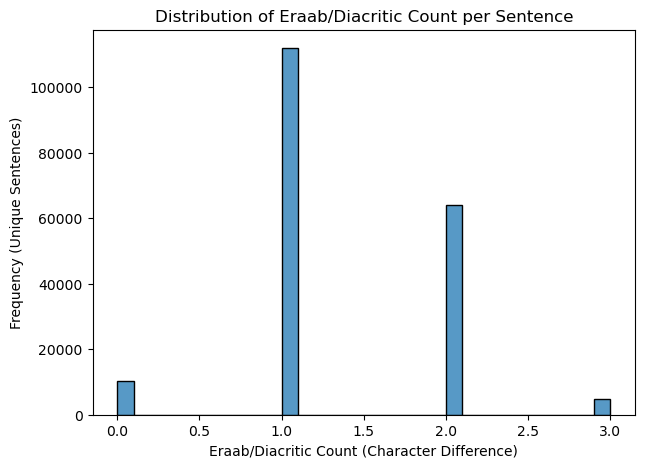

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['sentence_len'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Sentence Length (Characters)')
axes[0].set_xlabel('Sentence Length (Characters)')
axes[0].set_ylabel('Frequency')

sns.histplot(df['sentence_word_count'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Sentence Word Count')
axes[1].set_xlabel('Sentence Word Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('text_distribution_histograms.png')

plt.figure(figsize=(7, 5))
sns.histplot(df['eraab_count'], bins=30, kde=False)
plt.title('Distribution of Eraab/Diacritic Count per Sentence')
plt.xlabel('Eraab/Diacritic Count (Character Difference)')
plt.ylabel('Frequency (Unique Sentences)')
plt.savefig('eraab_count_histogram.png')

In [32]:
df['raw_words'] = df['text_no_eraab'].apply(lambda x: x.split())
df['diacritized_words'] = df['sentence'].apply(lambda x: x.split())

In [33]:
misaligned_count = (df['raw_words'].apply(len) != df['diacritized_words'].apply(len)).sum()

In [34]:
misaligned_count

0

In [35]:
word_pairs = df.apply(
    lambda row: list(zip(row['raw_words'], row['diacritized_words'])),
    axis=1
).explode().apply(pd.Series)
word_pairs.columns = ['raw_word', 'diacritized_word']
word_pairs.dropna(inplace=True) 

In [36]:
ambiguity_distribution = word_pairs.groupby('raw_word')['diacritized_word'].nunique().reset_index()
ambiguity_distribution.columns = ['raw_word', 'ambiguity_count']

In [37]:
final_distribution = ambiguity_distribution['ambiguity_count'].value_counts().sort_index().reset_index()
final_distribution.columns = ['ambiguity_count', 'word_count']

In [39]:
final_distribution

,ambiguity_count,word_count
0,1,1350
1,2,85
2,3,22
3,4,2
4,5,1


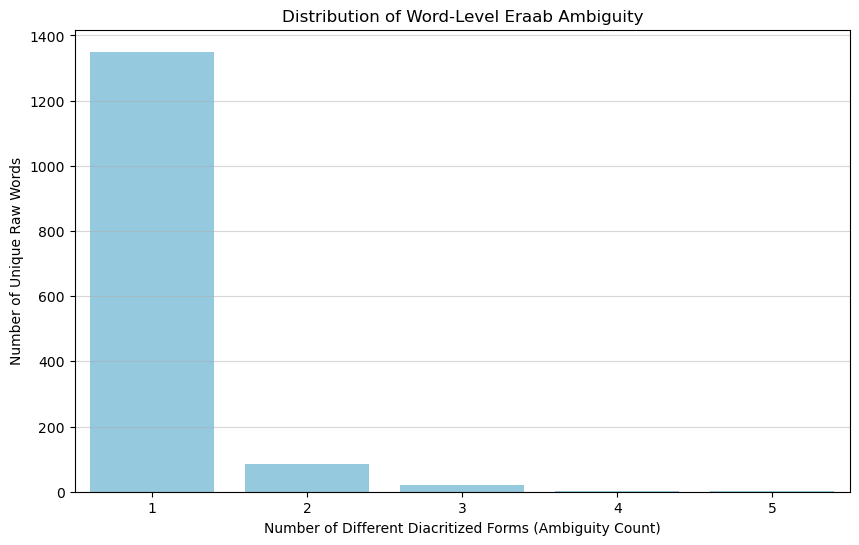

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ambiguity_count', y='word_count', data=final_distribution, color='skyblue')
plt.title('Distribution of Word-Level Eraab Ambiguity')
plt.xlabel('Number of Different Diacritized Forms (Ambiguity Count)')
plt.ylabel('Number of Unique Raw Words')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.5)
plt.savefig('word_ambiguity_distribution.png')

In [40]:
top_ambiguous_words = ambiguity_distribution[ambiguity_distribution['ambiguity_count'] > 1].sort_values(
    by='ambiguity_count', ascending=False
)

print(f"Top 10 Most Ambiguous Words by Diacritization Count")
print(top_ambiguous_words.head(10).to_string(index=False))

Top 10 Most Ambiguous Words by Diacritization Count
raw_word  ambiguity_count
      سر                5
     گرد                4
     ترک                4
     کره                3
     کنه                3
  پله‌ها                3
    سرور                3
    رفت.                3
      پر                3
      شل                3


In [41]:
top_words_list = top_ambiguous_words['raw_word'].tolist()

if top_words_list:
    print("\nExamples of Diacritized Forms for the Top 3 Most Ambiguous Words")

    example_forms = word_pairs[word_pairs['raw_word'].isin(top_words_list)]

    word_forms_summary = example_forms.groupby('raw_word')['diacritized_word'].unique().apply(list).reset_index()

    word_forms_summary.columns = ['Raw Word', 'Unique Diacritized Forms']

    print(word_forms_summary.to_string(index=False, max_colwidth=100))


Examples of Diacritized Forms for the Top 3 Most Ambiguous Words
Raw Word        Unique Diacritized Forms
     ابا                    [اَبا, اِبا]
     ابر                   [اَبر, اَبَر]
     ارگ                    [اَرگ, اُرگ]
   اشکال                [اَشکال, اِشکال]
   اعمال         [اعمال, اَعمال, اِعمال]
     اپل                  [اَپِل, اِپُل]
      بر                  [بَر, بُر, بر]
     برس                  [بِرِس, بُرِس]
     بعد               [بَعد, بُعد, بعد]
     بلا                    [بَلا, بِلا]
      بن                      [بُن, بِن]
      به                  [به, بَه, بِه]
     بهت                  [بُهْت, بِهِت]
     ترس                     [ترس, ترسِ]
     ترک      [ترک, تَرَک, تَرْک, تُرْک]
     تست                  [تِسْت, تُسْت]
      تن                      [تَن, تُن]
     تنگ                    [تَنگ, تُنگ]
      تو                       [تو, تُو]
      تک                 [تَک, تُک, تِک]
     جرم               [جُرم, جِرم, جرم]
    جستن                [جَستَن,

In [42]:
ambiguity_counts = word_pairs.groupby('raw_word')['diacritized_word'].nunique().reset_index()
ambiguity_counts.columns = ['raw_word', 'ambiguity_count']

In [48]:
ambiguous_words_set = set(ambiguity_counts[ambiguity_counts['ambiguity_count'] > 1]['raw_word'])

In [52]:
def extract_context(row, ambiguous_words):
    """Extracts (preceding_word, ambiguous_word, following_word) tuples for all ambiguous words."""
    contexts = []
    words = row['raw_words']
    for i, word in enumerate(words):
        if word in ambiguous_words:
            preceding = words[i-1] if i > 0 else 'START_SENTENCE'
            following = words[i+1] if i < len(words) - 1 else 'END_SENTENCE'
            contexts.append((preceding, word, following))
    return contexts

In [53]:
df

,sentence,text_no_eraab,sentence_len,text_no_eraab_len,sentence_word_count,text_no_eraab_word_count,eraab_count,raw_words,diacritized_words
0,گوشی جدید اَپِل دیروز رونمایی شد.,گوشی جدید اپل دیروز رونمایی شد.,33,31,6,6,2,"[گوشی, جدید, اپل, دیروز, رونمایی, شد.]","[گوشی, جدید, اَپِل, دیروز, رونمایی, شد.]"
1,اَپِل همیشه طراحی خاصی دارد.,اپل همیشه طراحی خاصی دارد.,28,26,5,5,2,"[اپل, همیشه, طراحی, خاصی, دارد.]","[اَپِل, همیشه, طراحی, خاصی, دارد.]"
2,گوشی جدید اَپِل دیروز رونمایی شد.,گوشی جدید اپل دیروز رونمایی شد.,33,31,6,6,2,"[گوشی, جدید, اپل, دیروز, رونمایی, شد.]","[گوشی, جدید, اَپِل, دیروز, رونمایی, شد.]"
3,شرکت اَپِل نوآوری‌های زیادی ارائه داده.,شرکت اپل نوآوری‌های زیادی ارائه داده.,39,37,6,6,2,"[شرکت, اپل, نوآوری‌های, زیادی, ارائه, داده.]","[شرکت, اَپِل, نوآوری‌های, زیادی, ارائه, داده.]"
4,اَپِل همیشه طراحی خاصی دارد.,اپل همیشه طراحی خاصی دارد.,28,26,5,5,2,"[اپل, همیشه, طراحی, خاصی, دارد.]","[اَپِل, همیشه, طراحی, خاصی, دارد.]"
...,...,...,...,...,...,...,...,...,...
190993,همه از حَشَر احترام می‌گذارند.,همه از حشر احترام می‌گذارند.,30,28,5,5,2,"[همه, از, حشر, احترام, می‌گذارند.]","[همه, از, حَشَر, احترام, می‌گذارند.]"
190994,دیروز با حَشَر صحبت کردم و چیزهای جالبی گفت.,دیروز با حشر صحبت کردم و چیزهای جالبی گفت.,44,42,9,9,2,"[دیروز, با, حشر, صحبت, کردم, و, چیزهای, جالبی,...","[دیروز, با, حَشَر, صحبت, کردم, و, چیزهای, جالب..."
190995,به نظر من حَشَر نقش مهمی در خانواده دارد.,به نظر من حشر نقش مهمی در خانواده دارد.,41,39,9,9,2,"[به, نظر, من, حشر, نقش, مهمی, در, خانواده, دارد.]","[به, نظر, من, حَشَر, نقش, مهمی, در, خانواده, د..."
190996,وقتی اسم حَشَر را می‌شنوم یاد کودکی‌ام می‌افتم.,وقتی اسم حشر را می‌شنوم یاد کودکی‌ام می‌افتم.,47,45,8,8,2,"[وقتی, اسم, حشر, را, می‌شنوم, یاد, کودکی‌ام, م...","[وقتی, اسم, حَشَر, را, می‌شنوم, یاد, کودکی‌ام,..."


In [54]:
df_contexts = df.apply(
    lambda row: extract_context(row, ambiguous_words_set),
    axis=1
).explode().apply(pd.Series)

In [55]:
df_contexts.columns = ['preceding_word', 'ambiguous_word', 'following_word']
df_contexts.dropna(inplace=True)

In [56]:
context_analysis = df_contexts.groupby('ambiguous_word').agg(
    unique_preceding_count=('preceding_word', 'nunique'),
    unique_following_count=('following_word', 'nunique')
).reset_index()

In [57]:
summary_df = pd.merge(
    ambiguity_counts,
    context_analysis,
    left_on='raw_word',
    right_on='ambiguous_word',
    how='inner'
)
summary_df.drop(columns=['ambiguous_word'], inplace=True)

In [58]:
top_context_analysis = summary_df[summary_df['ambiguity_count'] > 1].sort_values(
    by='ambiguity_count', ascending=False
).head(10)


In [59]:
top_context_analysis.to_string(index=False)

'raw_word  ambiguity_count  unique_preceding_count  unique_following_count\n      سر                5                       9                      10\n     گرد                4                       9                      11\n     ترک                4                       8                      10\n     کره                3                      12                      16\n     کنه                3                       7                       8\n  پله\u200cها                3                       2                       3\n    سرور                3                       7                       8\n    رفت.                3                      12                       1\n      پر                3                      23                      17\n      شل                3                      18                      17'

In [60]:
top_word = top_context_analysis['raw_word'].iloc[0]

In [61]:
example_contexts = df_contexts[df_contexts['ambiguous_word'] == top_word][
    ['preceding_word', 'following_word']
].drop_duplicates().head(5)


In [62]:
example_contexts['Example Context (Raw Text)'] = example_contexts.apply(
    lambda row: f"{row['preceding_word']} {top_word} {row['following_word']}".replace("START_SENTENCE ", "").replace(" END_SENTENCE", ""),
    axis=1
)

In [63]:
print(example_contexts['Example Context (Raw Text)'].to_string(index=False))

 پشت سر گذاشت.
نیاید سر کلاس.
         سر در
  از سر احترام
     اسم سر را
